## Transformers is all you need

In [ ]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


## Importing dependencies

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import nltk

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Loading Data and splitting it to train and test

In [4]:
from datasets import load_dataset

bbc_news = load_dataset("gopalkalpande/bbc-news-summary")


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/gopalkalpande--bbc-news-summary-2a01b492fd0ba579/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
bbc_news = bbc_news['train'].train_test_split(test_size=0.2,shuffle=True)
bbc_news

DatasetDict({
    train: Dataset({
        features: ['File_path', 'Articles', 'Summaries'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['File_path', 'Articles', 'Summaries'],
        num_rows: 445
    })
})

## visualizing data

In [6]:
bbc_news['train'][0]

{'File_path': 'sport',
 'Articles': 'Henman decides to quit Davis Cup..Tim Henman has retired from Great Britain\'s Davis Cup team...The 30-year-old, who made his Davis Cup debut in 1994, is now set to fully focus on the ATP Tour and on winning his first Grand Slam event. "I\'ve made no secret of the fact that representing Great Britain has always been a top priority for me throughout my career," Henman told his website. Captain Jeremy Bates has touted Alex Bogdanovic and Andrew Murray as possible replacements for the veteran. Henman added that he was available to help Britain in its bid for Davis Cup success, with the next tie against Israel in March . "Although I won\'t be playing, I would still like to make myself available to both Jeremy and the LTA in the future so that I can draw upon my experience in the hope of trying to help the British players develop their full potential," he added. "I\'ve really enjoyed playing in front of the thousands of British fans both home and abroad 

<Axes: ylabel='count'>

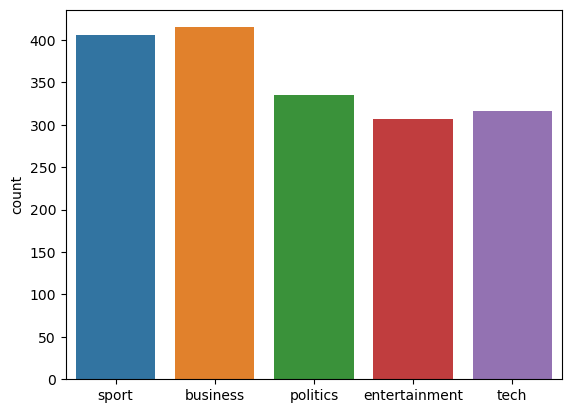

In [7]:
category_train = bbc_news['train']['File_path']
sns.countplot(x=category_train)

<Axes: ylabel='count'>

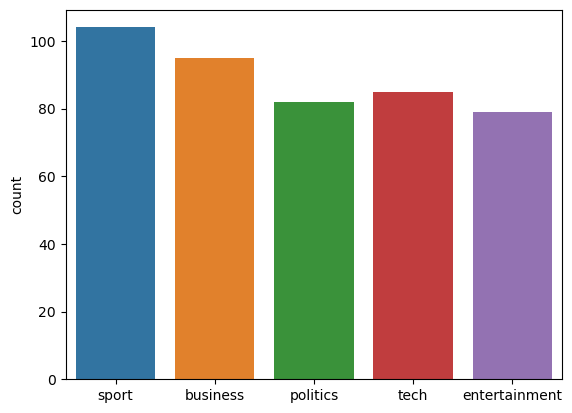

In [8]:
category_test = bbc_news['test']['File_path']
sns.countplot(x=category_test)

In [9]:
bbc_news.set_format(type='pandas')
df_train = bbc_news['train'][:]
df_test = bbc_news['test'][:]

## Preprocessing dataset

In [10]:
import re
import nltk
nltk.download('punkt')
!pip install contractions
import contractions
from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
from nltk.tokenize import sent_tokenize
from datasets import Dataset,DatasetDict
def remove_stopwords(text):
    words = text.split()
#     lemmatizer = WordNetLemmatizer()
    processed_text = [word for word in words if word not in stopwords.words('english')]
#     print(processed_text)
#     processed_text = [ lemmatizer.lemmatize(word) for word in processed_text]
#     print(processed_text)
    return ' '.join(processed_text)
def pre_process_df(df1):
    df = df1.copy()
    prefix = "summarize: "
    for col in ['Articles']:
        df[col] = df1[col].apply(lambda x: prefix+x)
        df[col] = df[col].apply(lambda x: contractions.fix(x))
        df[col] = df[col].apply(str.lower)
        df[col] = df[col].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x))
        df[col] = df[col].apply(lambda x: remove_stopwords(x))
        df[col] = df[col].apply(lambda x: re.sub(' +', ' ', x))
    return df
bbc_news_train = pre_process_df(df_train)
bbc_news_test = pre_process_df(df_test)
ds_dict = {'train' : Dataset.from_pandas(bbc_news_train),
           'test' : Dataset.from_pandas(bbc_news_test)}
bbc_news = DatasetDict(ds_dict)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.8 MB/s eta 0:00:00


In [11]:
bbc_news['train'][10]

{'File_path': 'business',
 'Articles': 'summarize profits jump china top bank industrial commercial bank icbc china biggest lender seen 18 jump profits 2004 increase earnings allowed firm write bad loans pave way state bailout eventual stock market listing china trying clean banking system weighed billions dollars unpaid loans already pumped 45bn £24bn two largest banks identified icbc recipient aid icbc profits 74 7bn yuan 9bn £4 8bn 2004 bank said statement percentage non performing loans dropped 19 1 2 percentage points icbc founded 1984 total assets 5 3 trillion yuan end 2003 china committed gradually opening banking sector joined world trade organisation 2002',
 'Summaries': "It has already pumped $45bn (£24bn) into two of its largest banks, and has identified ICBC as a recipient of aid.ICBC's profits were 74.7bn yuan ($9bn; £4.8bn) in 2004, the bank said in a statement.Industrial and Commercial Bank (ICBC), China's biggest lender, has seen an 18% jump in profits during 2004.China

## Converting dataset to format required by our model

In [12]:
from transformers import AutoTokenizer
model_checkpoint = "t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
# sequence = "Using a Transformer network is simple"
# text = tokenizer.tokenize(bbc_news['train'][10]['Articles'])
max_input_length = 512
max_target_length = 100
def preprocess_function(examples):
    model_inputs = tokenizer(
        examples["Articles"],
        max_length=max_input_length,
        truncation=True,
    )
    labels = tokenizer(
        examples["Summaries"], max_length=max_target_length, truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs
# def tokenize_function(example):
#     return tokenizer(example["Articles"], example["Summaries"], truncation=True)
tokenized_datasets = bbc_news.map(preprocess_function, batched=True)
# data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
tokenized_datasets

/opt/conda/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['File_path', 'Articles', 'Summaries', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['File_path', 'Articles', 'Summaries', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 445
    })
})

In [13]:
tokenized_datasets = tokenized_datasets.remove_columns(bbc_news['train'].column_names)
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 445
    })
})

## Importing pretrained model

In [14]:
from transformers import AutoModelForSeq2SeqLM
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

## Args for finetuning model for our bbc dataset

In [15]:
from transformers import Seq2SeqTrainingArguments

batch_size = 8
num_train_epochs = 8
# Show the training loss with every epoch
logging_steps = len(tokenized_datasets["train"]) // batch_size
model_name = model_checkpoint.split("/")[-1]

args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned-bbc-lemmatized",
    evaluation_strategy="epoch",
    learning_rate=5.6e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=num_train_epochs,
    predict_with_generate=True,
    logging_steps=logging_steps,
#     push_to_hub = True
)

## metric for evaluation

In [16]:
import numpy as np
!pip install rouge_score
!pip install evaluate
import evaluate
rouge_score = evaluate.load("rouge")
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode generated summaries into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode reference summaries into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # ROUGE expects a newline after each sentence
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]
    # Compute ROUGE scores
    result = rouge_score.compute(
        predictions=decoded_preds, references=decoded_labels, use_stemmer=True
    )
    # Extract the median scores
#     print(result)
    result = {key: value * 100 for key, value in result.items()}
    return {k: round(v, 4) for k, v in result.items()}

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=6861475829da9bc1828e2d80c3da3c8d847f0b8de0fcde083c697313c7c5104e
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━

In [17]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

## Finetuning our model

In [18]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [19]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,1.738400,1.241968,20.512800,9.772100,17.125800,17.457300
2,1.308800,1.096715,21.278600,10.814400,17.919000,18.202100
3,1.152400,1.042406,21.892400,11.566500,18.693200,18.907200
4,1.065800,1.018156,21.561000,11.307300,18.256500,18.523500
5,0.999200,1.003855,21.460600,11.346900,18.291500,18.573100
6,0.962800,0.995667,21.724800,11.770700,18.611400,18.883000
7,0.930300,0.991041,21.644200,11.728300,18.677900,18.930600
8,0.915300,0.991073,21.573600,11.672100,18.591500,18.817700


TrainOutput(global_step=1784, training_loss=1.133283090163774, metrics={'train_runtime': 1656.4677, 'train_samples_per_second': 8.592, 'train_steps_per_second': 1.077, 'total_flos': 8141953728015360.0, 'train_loss': 1.133283090163774, 'epoch': 8.0})

In [20]:
trainer.evaluate()

{'eval_loss': 0.991073489189148,
 'eval_rouge1': 21.5736,
 'eval_rouge2': 11.6721,
 'eval_rougeL': 18.5915,
 'eval_rougeLsum': 18.8177,
 'eval_runtime': 39.9779,
 'eval_samples_per_second': 11.131,
 'eval_steps_per_second': 1.401,
 'epoch': 8.0}

## Using saved checkpoint to see how our model works!!!

In [25]:
from transformers import pipeline

hub_model_id = "/kaggle/working/t5-base-finetuned-bbc-lemmatized/checkpoint-1000"
summarizer = pipeline("summarization", model=hub_model_id)

In [26]:
bbc_news["test"][0]["Articles"]

'summarize parmar ruled davis cup tie knee injury forced arvind parmar great britain davis cup tie israel left alex bogdanovic line take second singles place parmar picked injury last week failed recover time europe africa zone tie begins tel aviv friday bogdanovic looks set take second singles place alongside greg rusedski gb captain jeremy bates could use 17 year old andrew murray david sherwood doubles rubber bogdanovic murray pulled tournaments last week injury expected fit jamie delgado lee childs called squad tel aviv designated hitters team practice bates plans call either squad present unheralded sherwood surprise inclusion squad announced last week bates said david earned place squad merit form results last 12 months 6ft 4in sherwood ranked 264th world lta high hopes futures tournament wins wrexham edinburgh sheffield born right hander aged 24 also reached another final plaisir france week making semi final mulhouse bates glad rusedski available tim henman retirement davis cup

In [27]:
def print_summary(idx):
    review = bbc_news["test"][idx]["Articles"]
#     print(idx)
#     title = bbc_news["test"][idx]["File_Path"]
    summary = summarizer(bbc_news["test"][idx]["Articles"])[0]["summary_text"]
    print(f"'>>> Review: {review}'")
# #     print(f"\n'>>> Title: {title}'")
    print(f"\n'>>> Summary: {summary}'")

In [28]:
print_summary(10)

'>>> Review: summarize band aid retains number one spot charity single band aid 20 held chart top spot second week strengthening chances becoming christmas number one know christmas featuring artists including chris martin jamelia held kylie minogue remain week biggest single next week chart reveal festive chart topper minogue latest release believe went number two pushing ice cube three destiny child also slipped one place four lose breath followed girls aloud five children need record stand new entry top 10 came robbie williams track misunderstood new track written greatest hits album new releases entire top 40 album charts record companies put big releases early hoping cash lucrative christmas market u2 dismantle bomb remains number one third week row followed williams greatest hits opera band il divo moved one place eponymous album number three maroon 5 album songs jane moved number seven despite released 47 weeks ago abba gold greatest hits album crept back top 40 nine years first

In [ ]:
def hello(idx):
    print(idx)
hello(10)